# Backpropagation Algorithms

### Dr. David Raj Micheal


In [3]:
import numpy as np

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Consider a single neuron with one output layer and no hidden layers. Assume that the output neuron uses the sigmoid activation function. 

<img src="regression.pdf" width="400">

Write code to run Gradient descent algorithm (Batch, mini-batch, stochastic) for the following data

In [6]:
X = np.array([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.array([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

Lets first calculate some feed forwards.

In [7]:
w_init = -1
b_init = 2

def sigmoid(a):
    return 1./(1+np.exp(-a))

## calculating a_11
for x in X:
    a_11 = w_init*x + b_init
    h_11 = sigmoid(a_11)
    print(h_11)

0.18242552380635635
0.8388910504234147
0.23147521650098232
0.9820137900379085
0.6224593312018546
0.9241418199787566


In [8]:
## What is the error now?

for x,y in zip(X,Y):
    a_11 = w_init*x + b_init
    h_11 = sigmoid(a_11)
    err = h_11 - y
    print(err)

-0.31757447619364365
0.3388910504234147
-0.26852478349901765
0.48201379003790845
0.5224593312018546
0.6241418199787565


In [9]:
for x,y in zip(X,Y):
    a_11 = w_init*x + b_init
    h_11 = sigmoid(a_11)
    err = (h_11 - y)**2
    print(err)

0.10085354792966714
0.11484714405708542
0.0721055593531943
0.2323372937867089
0.2729637527598892
0.3895530114463945


In [10]:
err = 0
for x,y in zip(X,Y):
    a_11 = w_init*x + b_init
    h_11 = sigmoid(a_11)
    err += (h_11 - y)**2
print(err)

1.1826603093329395


### Stochastic Gradient Descent

<img src="singleBackpropagation.pdf" width="400">

Loss Function: 
$L(w,b) = (y - \hat y)^2$.

Therefore, 
\begin{align*}
\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \hat y}\times
                                 \frac{\partial \hat y}{\partial  a_{11}}\times
                                 \frac{\partial a_{11}}{\partial w}
\end{align*}

Note that,
\begin{align*}
\frac{\partial a_{11}}{\partial w} & = x_1 \\
\frac{\partial \hat y}{\partial  a_{11}} & = \frac{\partial}{\partial a_{11}}\left( sigmoid (a_{11})\right) \\
& = \frac{\partial}{\partial a_{11}}\left( \frac 1 {1+e^{-a_{11}}}\right) \\
& = \frac {-1} {\left(1+e^{-a_{11}}\right)^2}  \times e^{-a_{11}} \times -1 \\
& = \frac {e^{-a_{11}}} {\left(1+e^{-a_{11}}\right)^2}  \\
& = \hat y (1 - \hat y) \quad (why?)  \\
\frac{\partial L}{\partial \hat y} & = 2 (y-\hat y) (-1) = -2 (y-\hat y)
\end{align*}
Hence, 

\begin{align*}
\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \hat y}\times
                                 \frac{\partial \hat y}{\partial  a_{11}}\times
                                 \frac{\partial a_{11}}{\partial w}\\
                              & = -2 (y - \hat y)\times \hat y  (1- \hat y) \times x_1
\end{align*}



In [11]:
def grad_w(x,y,w,b):
    a_11 = w*x + b
    y_hat = sigmoid(a_11)
    grad = -2 * (y - y_hat) * y_hat * (1-y_hat) * x
    return grad

In [12]:
for x,y in zip(X,Y):
    grad_w(x,y,w = 2, b=1)

## Calculating $\frac{\partial L}{\partial b}$
Similarly,  
\begin{align*}
\frac{\partial L}{\partial b} & = \frac{\partial L}{\partial \hat y}\times
                                 \frac{\partial \hat y}{\partial  a_{11}}\times
                                 \frac{\partial a_{11}}{\partial b}\\
                              & = -2 (y - \hat y)\times \hat y  (1- \hat y) \times 1
\end{align*}

In [13]:
def grad_b(x,y,w,b):
    a_11 = w*x + b
    y_hat = sigmoid(a_11)
    grad = -2 * (y - y_hat) * y_hat * (1-y_hat)
    return grad

In [14]:
x = 3.5

At the forward pass, we get

In [15]:
w = -2; b = 1

a_11 = w*x + b
y_hat = sigmoid(a_11)
y_hat

np.float64(0.0024726231566347743)

But, the true $y$ value is 0.5

So, what is the squared error loss?

In [16]:
y = 0.5
err = (y-y_hat)**2
err

np.float64(0.24753349070863995)

Let us now, update the $w$ and $b$:

In [17]:
eta = 0.9
print('grad w = ', grad_w(x=3.5,y=0.5,w=-2,b=1))
print('grad w = ', grad_b(x=3.5,y=0.5,w=-2,b=1))

grad w =  -0.008590091283831066
grad w =  -0.0024543117953803044


In [18]:
w_new = w - eta * grad_w(x=3.5,y=0.5,w=-2,b=1)
b_new = b - eta * grad_b(x=3.5,y=0.5,w=-2,b=1)
print("w_new : ", w_new)
print("b_new : ", b_new)

w_new :  -1.992268917844552
b_new :  1.0022088806158422


Now, for the next pass, we will use the next row, and so on...

In [19]:
w = -2; b = 1; eta = 0.9
for (x,y) in zip(X,Y):
    dw = grad_w(x=x,y=y,w=w,b=b)
    db = grad_b(x=x,y=y,w=w,b=b)
    w = w - eta * dw
    b = b - eta * db

In [20]:
print(w,'\t',b) # updated w and b

-1.9284102929220686 	 0.8504362751346908


### Running for many times to improve this



In [21]:
epochs = 10
w = -2; b = 1; eta = 0.9
for i in range(epochs):
    for (x,y) in zip(X,Y):
        dw = grad_w(x=x,y=y,w=w,b=b)
        db = grad_b(x=x,y=y,w=w,b=b)
        w = w - eta * dw
        b = b - eta * db

In [22]:
b

np.float64(-0.384384524671664)

In [23]:
y_hat = sigmoid(w*3.5 + b)
y_hat 

np.float64(0.24528950816097767)

In [24]:
y = 0.5
err = (y-y_hat)**2
err

np.float64(0.06487743465287667)

We will do a small adjustments to the code to keep track of the loss, w and b values at every epochs and plot them to understand what is going on.

In [25]:
epochs = 10
eta = 0.9
# w = -7; b = 4; 
w = 2; b = 1;

J = []

for i in range(epochs):
    err = 0
    for (x,y) in zip(X,Y):
        dw = grad_w(x=x,y=y,w=w,b=b)
        db = grad_b(x=x,y=y,w=w,b=b)
        w = w - eta * dw
        b = b - eta * db
        err += (y-sigmoid(w*x+b))**2
    J.append([w.round(4),b.round(4),(err/X.shape[0]).round(4)])

In [26]:
journal = pd.DataFrame(J,columns=["w","b","Loss"])#.reset_index()
journal.index.name = "epochs"
journal

,w,b,Loss
epochs,,,
0,1.8900,0.8304,0.2673
1,1.7471,0.6583,0.2587
2,1.5557,0.4788,0.2470
3,1.2830,0.2819,0.2277
4,0.8453,0.0430,0.1863
5,0.0362,-0.2862,0.0749
6,-0.2105,-0.4255,0.0118
7,-0.2009,-0.4602,0.0116
8,-0.1964,-0.4812,0.0115


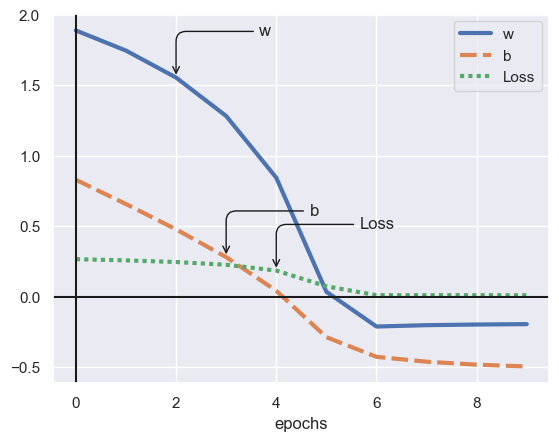

In [27]:
offset=30
arrowprops = dict(
    arrowstyle="->",
    color='k',
    connectionstyle="angle,angleA=0,angleB=90,rad=10")
fig, ax = plt.subplots()
sns.lineplot(journal,linewidth = 3,ax=ax)
for (i,col) in enumerate(['w','b','Loss']):
    ax.annotate(col,
            xy=[i+2,journal.iloc[i+2][col]],
            xytext=(2*offset, offset),
            textcoords='offset points',
            arrowprops=arrowprops)

ax.axhline(color='k')
ax.axvline(color='k')
plt.show()

<Axes: xlabel='epochs', ylabel='Loss'>

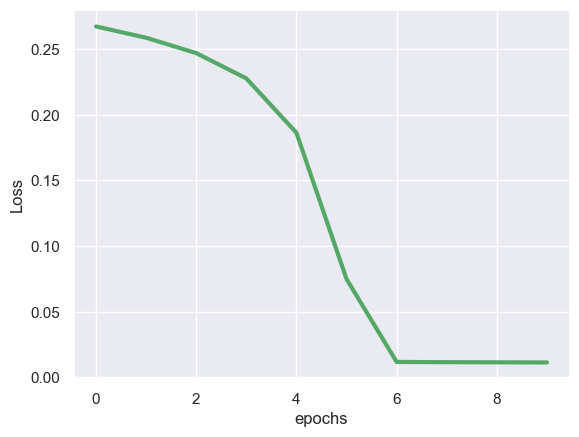

In [28]:
sns.lineplot(journal,x = 'epochs',y='Loss',linewidth = 3,color='g')